### XGBoost (Extreme Gradient Boosting) Classification

XGBoost (Extreme Gradient Boosting) is a powerful and efficient implementation of the Gradient Boosting framework. It is widely used for classification tasks due to its efficiency and performance. Here's a detailed explanation of XGBoost Classification along with a code example and visualization of performance metrics.

### Key Concepts of XGBoost Classification

1. **Boosting**: Combines the predictions of multiple simple models (trees) to improve overall performance.
2. **Gradient Boosting**: Sequentially adds new models to correct the errors made by existing models.
3. **Regularization**: XGBoost includes regularization terms to penalize model complexity, which helps to avoid overfitting.
4. **Tree Pruning**: XGBoost performs tree pruning and uses the max depth parameter to limit tree depth, which helps prevent overfitting.
5. **Handling Missing Values**: XGBoost can handle missing values internally, making it robust to incomplete datasets.
6. **Parallel Processing**: XGBoost can run in parallel, making it highly efficient on large datasets.

In [2]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

1. **Data Generation**:
   - We use `make_classification` to generate synthetic data for a classification problem. The data consists of 1000 samples with 10 features and 2 classes.

In [3]:
# Generating synthetic data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

2. **Data Splitting**:
   - The data is split into training and testing sets using `train_test_split`.

In [4]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. **Model Initialization**:
   - An `XGBClassifier` is initialized with parameters: `n_estimators=100` for the number of boosting rounds, `learning_rate=0.1` for the step size shrinkage, `max_depth=3` for the maximum depth of a tree, `use_label_encoder=False` to avoid using the label encoder (as of recent versions of XGBoost), and `eval_metric='logloss'` for the evaluation metric.

In [5]:
# Initializing XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=42)

4. **Model Training**:
   - The model is trained on the training data using the `fit` method.

In [6]:
# Training the XGBoost Classifier
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, ...)

5. **Predictions and Evaluation**:
   - Predictions are made on the test set using the `predict` method.
   - Accuracy is calculated to evaluate the overall performance.

In [7]:
# Making predictions on the test set
y_pred = xgb_classifier.predict(X_test)

6. **Confusion Matrix**:
   - The confusion matrix is generated and visualized using `confusion_matrix` and seaborn's `heatmap`.

In [8]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.885


7. **Classification Report**:
   - A classification report is generated using `classification_report` to provide detailed performance metrics like precision, recall, and F1-score for each class.

In [9]:
# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[84  5]
 [18 93]]


### Visualization

The confusion matrix and classification report provide detailed insights into the model's performance. The confusion matrix helps to understand how well the model is performing in terms of true positives, true negatives, false positives, and false negatives. The classification report gives a more comprehensive evaluation by providing precision, recall, and F1-score for each class.

By following this example, you can implement XGBoost Classification, evaluate its performance, and gain insights into how well it classifies the data. Adjusting parameters like `n_estimators`, `learning_rate`, `max_depth`, `subsample`, `colsample_bytree`, and others can help optimize the model further.

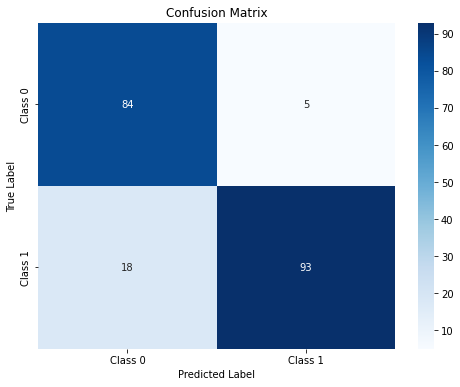

In [10]:
# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Generating classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.82      0.94      0.88        89
     Class 1       0.95      0.84      0.89       111

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200

